In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
dataset = load_iris()
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
df['flower_name'] = df.target.apply(lambda x: dataset.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

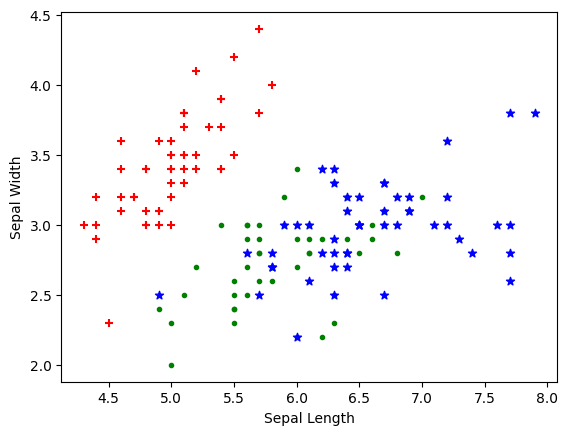

In [11]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="red", marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="green", marker='.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color="blue", marker='*')

In [12]:
X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
gaussian = GaussianNB().fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
cmg = confusion_matrix(y_test, y_pred)
cmg

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual')

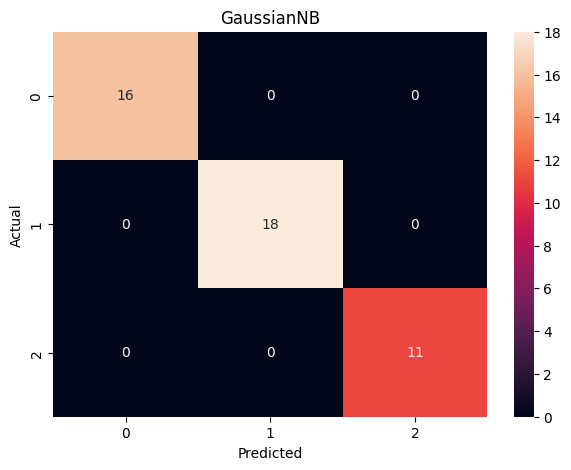

In [15]:
plt.figure(figsize=(7,5))
sns.heatmap(cmg, annot=True)
plt.title('GaussianNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [17]:
multinomial = MultinomialNB().fit(X_train, y_train)
y_pred = multinomial.predict(X_test)
cmm = confusion_matrix(y_test, y_pred)
cmm

array([[16,  0,  0],
       [ 0,  0, 18],
       [ 0,  0, 11]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual')

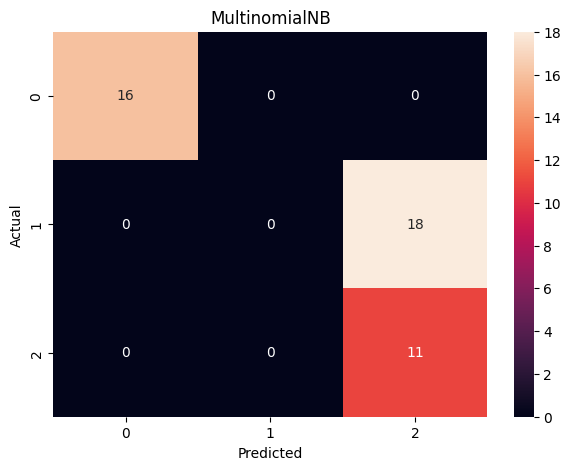

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(cmm, annot=True)
plt.title('MultinomialNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.00      0.00      0.00        18
           2       0.38      1.00      0.55        11

    accuracy                           0.60        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.45      0.60      0.49        45



c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [29]:
bernoulli = BernoulliNB(binarize=True).fit(X_train, y_train)
y_pred = bernoulli.predict(X_test)
cmb = confusion_matrix(y_test, y_pred)
cmb

array([[16,  0,  0],
       [ 2,  0, 16],
       [ 0,  0, 11]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual')

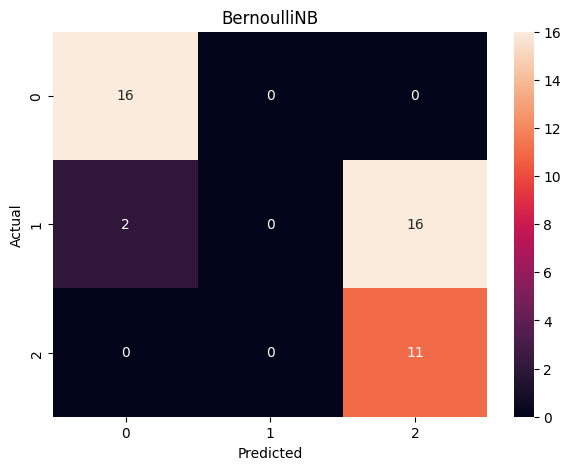

In [21]:
plt.figure(figsize=(7,5))
sns.heatmap(cmb, annot=True)
plt.title('BernoulliNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       0.00      0.00      0.00        18
           2       0.41      1.00      0.58        11

    accuracy                           0.60        45
   macro avg       0.43      0.67      0.51        45
weighted avg       0.42      0.60      0.48        45



c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [23]:
complement = ComplementNB().fit(X_train, y_train)
y_pred = complement.predict(X_test)
cmco = confusion_matrix(y_test, y_pred)
cmco

array([[16,  0,  0],
       [ 0,  0, 18],
       [ 0,  0, 11]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual')

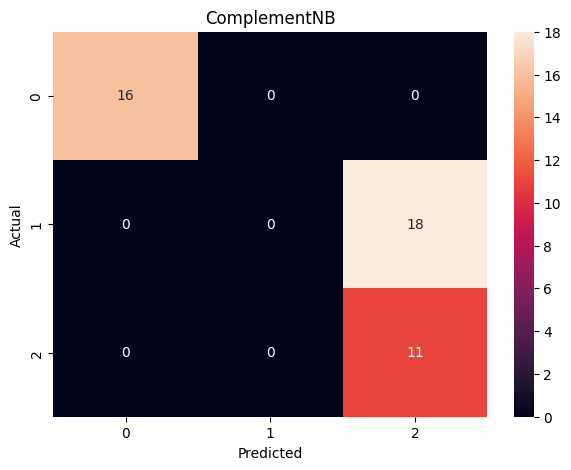

In [24]:
plt.figure(figsize=(7,5))
sns.heatmap(cmco, annot=True)
plt.title('ComplementNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.00      0.00      0.00        18
           2       0.38      1.00      0.55        11

    accuracy                           0.60        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.45      0.60      0.49        45



c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [26]:
categorical = CategoricalNB().fit(X_train, y_train)
y_pred = categorical.predict(X_test)
cmca = confusion_matrix(y_test, y_pred)
cmca

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  3,  8]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual')

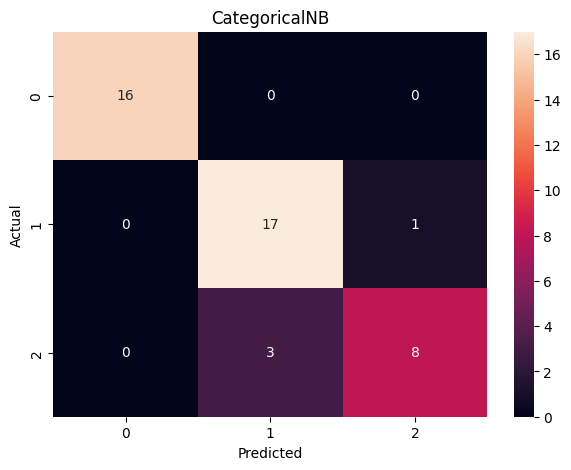

In [27]:
plt.figure(figsize=(7,5))
sns.heatmap(cmca, annot=True)
plt.title('CategoricalNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.94      0.89        18
           2       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45

